In [1]:
import numpy as np
from floris.tools import FlorisInterface
import matplotlib.pyplot as plt
import time
import yaml

/home/marucs/anaconda3/envs/thesis/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
with open('floris_examples/inputs/gch.yaml', 'r') as file:
    input_dict_gch = yaml.safe_load(file)
    solver_dict_gch = input_dict_gch["solver"]


with open('floris_examples/inputs/cc.yaml', 'r') as file:
    input_dict_cc = yaml.safe_load(file)
    solver_dict_cc = input_dict_gch["solver"]



solver_dict_gch["turbine_grid_points"] = 8
solver_dict_cc["turbine_grid_points"] = 4

fi_gch = FlorisInterface(input_dict_gch)
fi_cc = FlorisInterface(input_dict_cc)
D = 126

In [3]:

N_turb = 100
N_average = 5


In [4]:
# FOR GCH
avg_times_GCH = []
turbines_GCH = []
for i in range(1,N_turb):

    


    y_lay = np.zeros((i))
    x_lay = np.linspace(0, (i-1)*D*5, i)

    fi_gch.reinitialize( layout=( x_lay, y_lay) )


    times_mes = []
    for j in range(N_average):

        

        fi_gch.reinitialize( wind_directions=[270.0], wind_speeds=[8.0] )

        start = time.perf_counter()

        fi_gch.calculate_wake()

        end = time.perf_counter()

        #powers = fi.get_turbine_powers() / 1000.0  # calculated in Watts, so convert to kW

        

        walltime = end - start
        times_mes.append(walltime)
        #print(f"Wall time: {walltime:.3f} s")
    avg_time= np.mean(times_mes)
    #print(f"For {i} turbines the avg time:  {avg_time:.3f} s")
    avg_times_GCH.append(avg_time)
    turbines_GCH.append(i)

avg_times_GCH = np.array(avg_times_GCH)
turbines_GCH = np.array(turbines_GCH)


In [5]:
# FOR CC

avg_times_CC = []
turbines_CC = []
for i in range(1,N_turb):


    y_lay = np.zeros((i))
    x_lay = np.linspace(0, (i-1)*D*5, i)

    fi_cc.reinitialize( layout=( x_lay, y_lay) )


    times_mes = []
    for j in range(N_average):

        fi_cc.reinitialize( wind_directions=[270.0], wind_speeds=[8.0] )

        start = time.perf_counter()

        fi_cc.calculate_wake()

        end = time.perf_counter()

        #powers = fi_cc.get_turbine_powers() / 1000.0  # calculated in Watts, so convert to kW

        

        walltime = end - start
        times_mes.append(walltime)
        #print(f"Wall time: {walltime:.3f} s")
    avg_time= np.mean(times_mes)
    #print(f"For {i} turbines the avg time:  {avg_time:.3f} s")
    avg_times_CC.append(avg_time)
    turbines_CC.append(i)

avg_times_CC = np.array(avg_times_CC)
turbines_CC = np.array(turbines_CC)


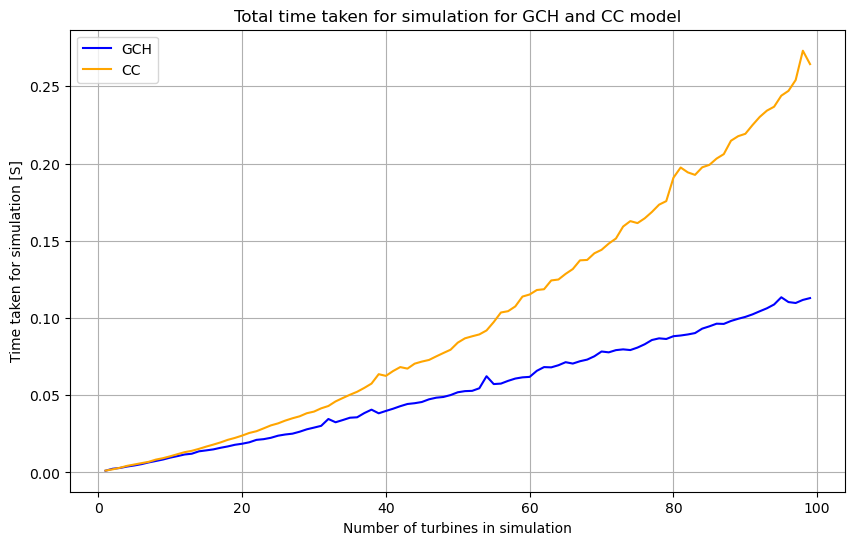

In [6]:
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.plot(turbines_GCH, avg_times_GCH, label="GCH", c="b")
plt.plot(turbines_CC, avg_times_CC, label="CC", c="orange")
plt.legend()
plt.grid()
plt.xlabel("Number of turbines in simulation")
plt.ylabel("Time taken for simulation [S]")
plt.title("Total time taken for simulation for GCH and CC model")
plt.show()

fig.savefig('Plots/Appendix_1/timeplot.png', dpi=150)

In [12]:
for i in range(20):
    print(f"For {turbines_CC[i]} turbines the avg time:  GCH {avg_times_GCH[i]:.4f} s  | CC {avg_times_CC[i]:.4f} s | diff is: {avg_times_CC[i]-avg_times_GCH[i]:.4f} s")

For 1 turbines the avg time:  GCH 0.0011 s  | CC 0.0012 s | diff is: 0.0001 s
For 2 turbines the avg time:  GCH 0.0024 s  | CC 0.0020 s | diff is: -0.0004 s
For 3 turbines the avg time:  GCH 0.0029 s  | CC 0.0030 s | diff is: 0.0001 s
For 4 turbines the avg time:  GCH 0.0038 s  | CC 0.0042 s | diff is: 0.0004 s
For 5 turbines the avg time:  GCH 0.0045 s  | CC 0.0051 s | diff is: 0.0006 s
For 6 turbines the avg time:  GCH 0.0054 s  | CC 0.0060 s | diff is: 0.0006 s
For 7 turbines the avg time:  GCH 0.0065 s  | CC 0.0069 s | diff is: 0.0004 s
For 8 turbines the avg time:  GCH 0.0074 s  | CC 0.0083 s | diff is: 0.0009 s
For 9 turbines the avg time:  GCH 0.0084 s  | CC 0.0092 s | diff is: 0.0009 s
For 10 turbines the avg time:  GCH 0.0096 s  | CC 0.0104 s | diff is: 0.0009 s
For 11 turbines the avg time:  GCH 0.0106 s  | CC 0.0118 s | diff is: 0.0012 s
For 12 turbines the avg time:  GCH 0.0116 s  | CC 0.0131 s | diff is: 0.0015 s
For 13 turbines the avg time:  GCH 0.0121 s  | CC 0.0140 s |

In [8]:
percentage_inc = []

for i in range(len(avg_times_GCH)):
    percentage_inc.append((avg_times_CC[i]-avg_times_GCH[i])/(avg_times_GCH[i])*100)

percentage_inc = np.array(percentage_inc)
    

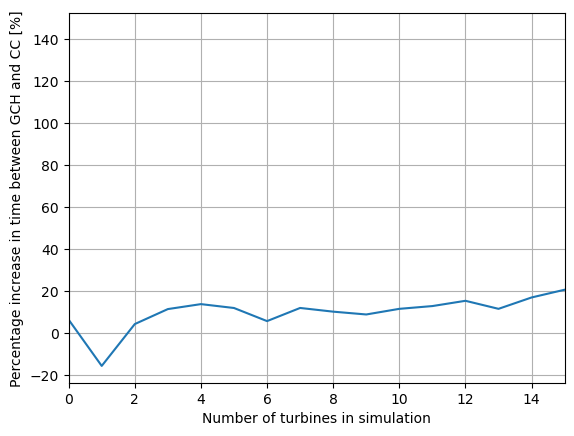

In [9]:
plt.plot(percentage_inc)
plt.grid()
plt.xlabel("Number of turbines in simulation")
plt.ylabel("Percentage increase in time between GCH and CC [%]")
plt.xlim([0, 15])
plt.show()